<a href="https://colab.research.google.com/github/Nisha40108/Mark-Park/blob/main/Masking_and_Predicting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
from __future__ import division
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import os, glob
import numpy as np
from moviepy.editor import VideoFileClip
cwd = os.getcwd()

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [74]:
def show_images(images, cmap=None):
    cols = 2
    rows = (len(images)+1)//cols

    plt.figure(figsize=(15, 12))
    for i, image in enumerate(images):
        plt.subplot(rows, cols, i+1)
        # use gray scale color map if there is only one channel
        cmap = 'gray' if len(image.shape)==2 else cmap
        plt.imshow(image, cmap=cmap)
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.show()

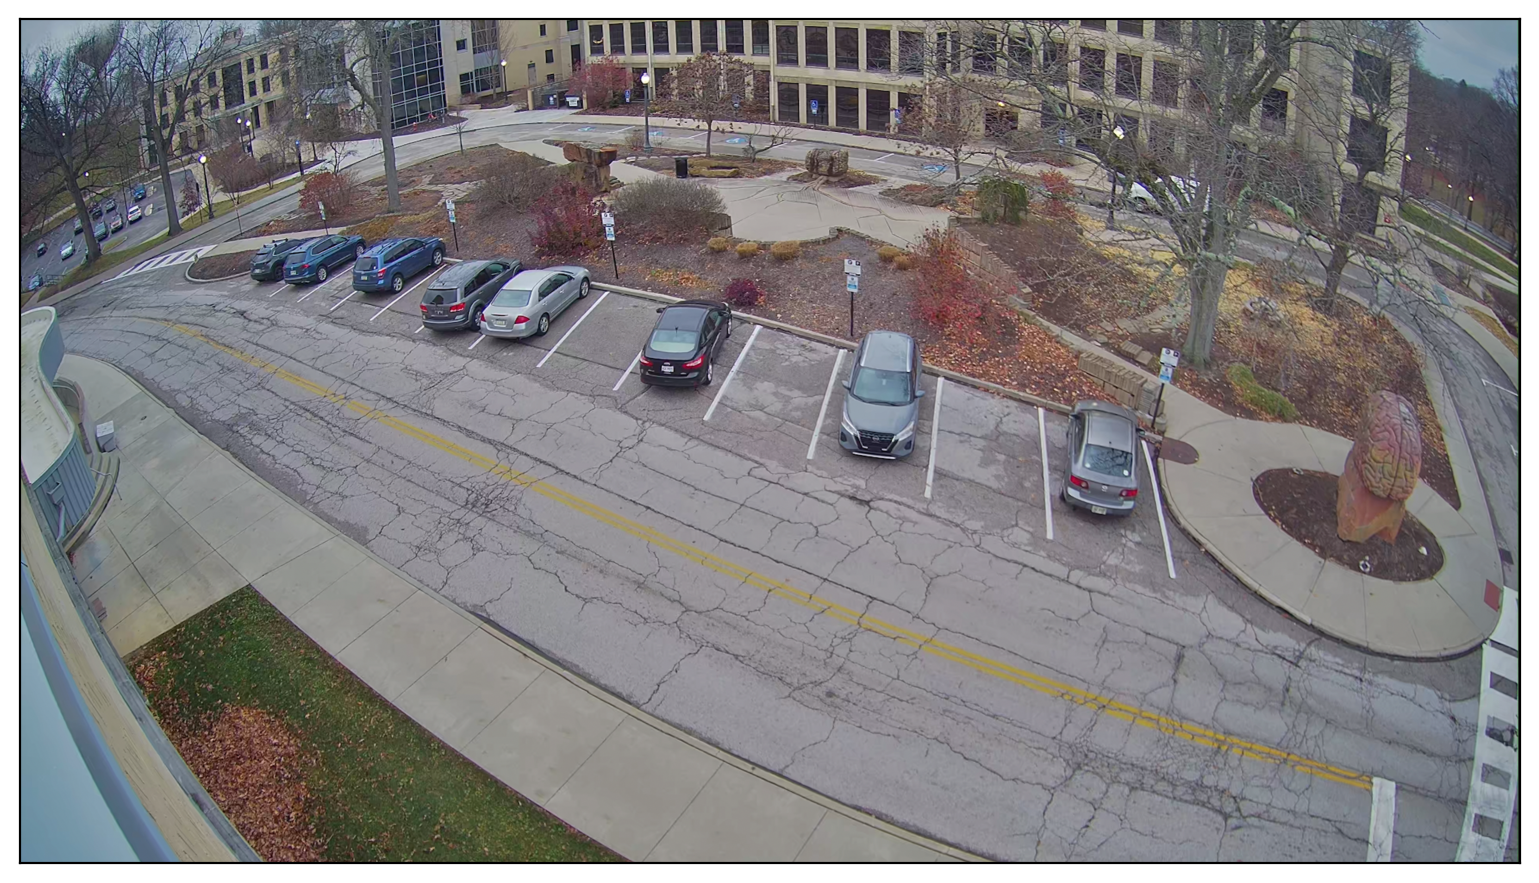

In [75]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt

images = [plt.imread(path) for path in glob.glob('/content/drive/MyDrive/nisha/test_images/RGBparkinglot2.png')]
show_images(images)

In [76]:
def print_image_info(images):
    for i, image in enumerate(images):
        # Check if the image is a NumPy array
        if isinstance(image, np.ndarray):
            # Extract file name from the path
            file_name = f"test_image_{i+1}.png"  # You may need to adjust this based on your actual file names

            # Print information about the image
            print(f"Image {i+1} (File: {file_name}) shape:", image.shape)
            print(f"Image {i+1} (File: {file_name}) type:", image.dtype)

            # Check number of channels and convert to RGB if it has an alpha channel
            if image.shape[2] == 4:
                print("Converting image to RGB.")
                image_rgb = cv2.cvtColor(image, cv2.COLOR_RGBA2RGB)
                print("Shape of image_rgb:", image_rgb.shape)
            else:
                print("Image is already RGB.")
                image_rgb = image.copy()

            image_rgb = image_rgb.astype(np.uint8)
            print("Image data type (after conversion):", image_rgb.dtype)
            print("Minimum pixel value:", np.min(image_rgb))
            print("Maximum pixel value:", np.max(image_rgb))
        else:
            print(f"Image {i+1} is not a NumPy array")

# Assuming 'images' is a list of images
print_image_info(images)


Image 1 (File: test_image_1.png) shape: (2160, 3840, 3)
Image 1 (File: test_image_1.png) type: float32
Image is already RGB.
Image data type (after conversion): uint8
Minimum pixel value: 0
Maximum pixel value: 1


Converting image to uint8.


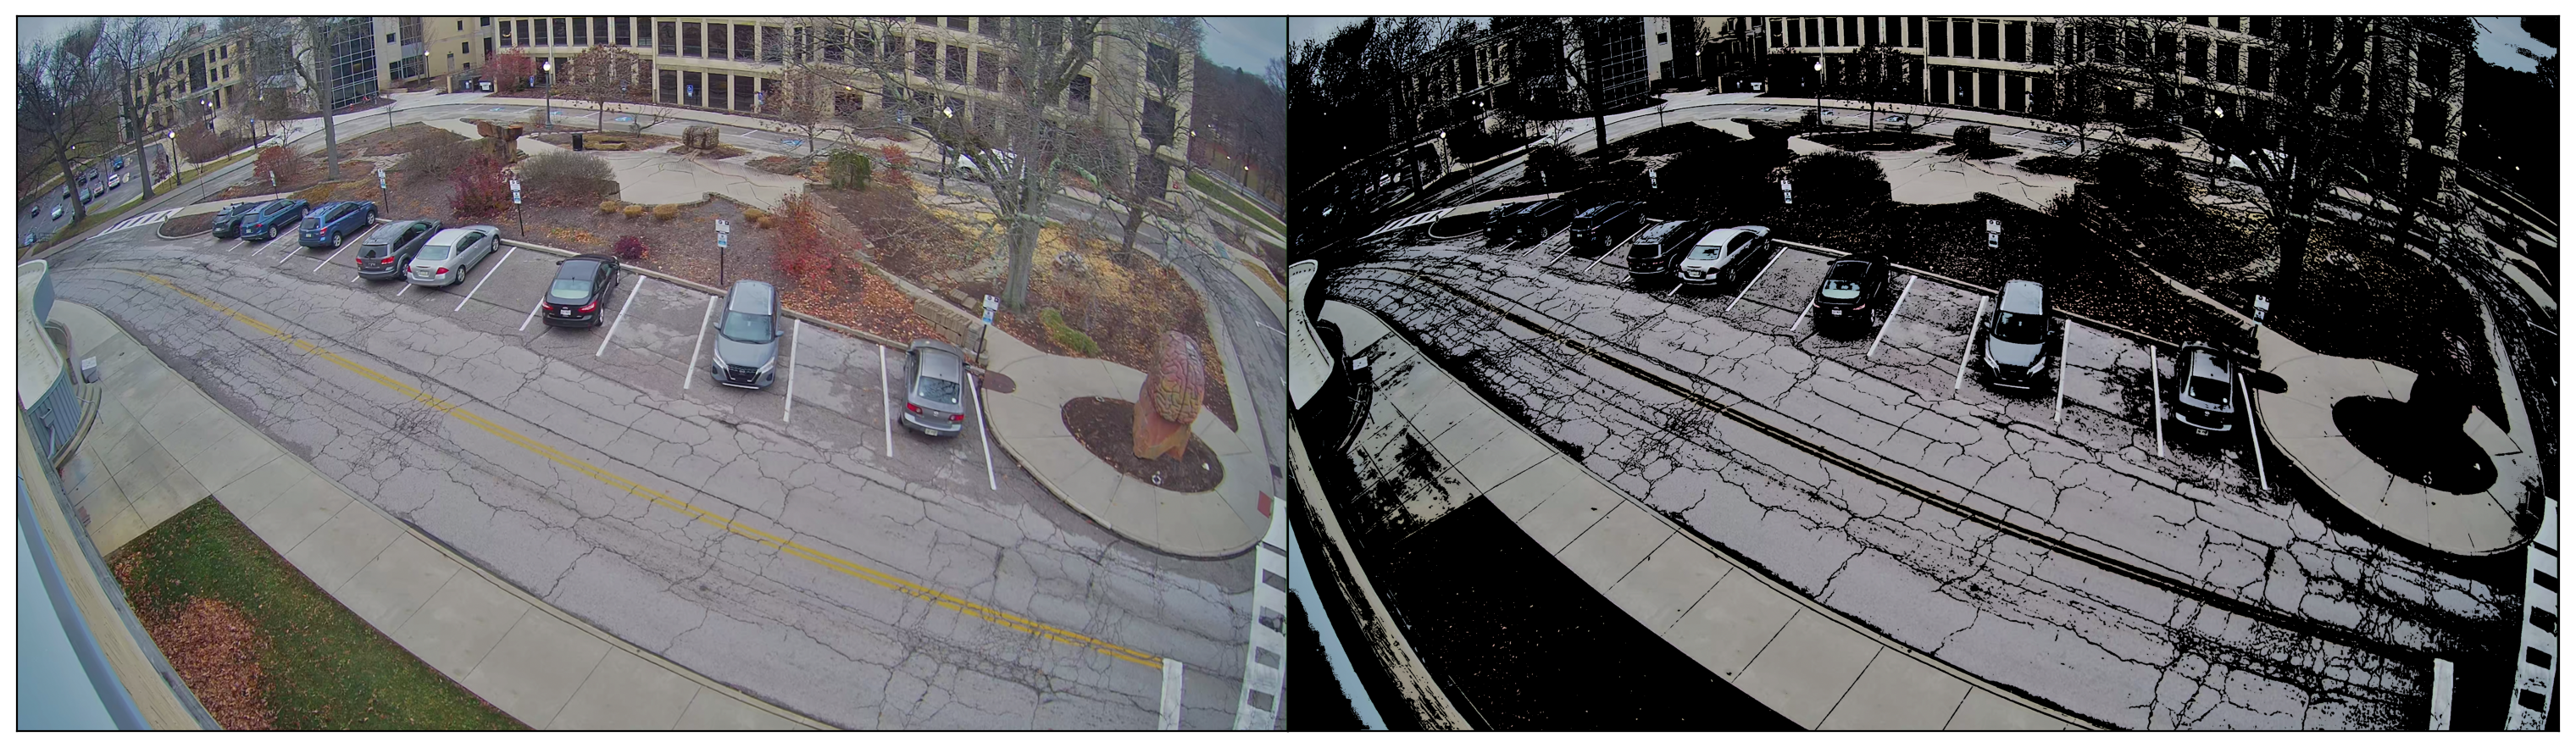

In [ ]:
def select_rgb_white_yellow(image):
    # Convert image to 3 channels (remove alpha channel if present)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_RGBA2RGB) if image.shape[2] == 4 else image

    # Convert image to uint8 if not already
    if image_rgb.dtype != np.uint8:
        print("Converting image to uint8.")
        image_rgb = (image_rgb * 255).astype(np.uint8)

    # Define white color mask
    lower_white = np.array([127, 127, 127], dtype=np.uint8)
    upper_white = np.array([255, 255, 255], dtype=np.uint8)
    white_mask = cv2.inRange(image_rgb, lower_white, upper_white)

    # Define yellow color mask
    lower_yellow = np.array([191, 191, 0], dtype=np.uint8)
    upper_yellow = np.array([255, 255, 255], dtype=np.uint8)
    yellow_mask = cv2.inRange(image_rgb, lower_yellow, upper_yellow)

    # Combine the masks
    combined_mask = cv2.bitwise_or(white_mask, yellow_mask)

    # Apply the combined mask to the original image
    masked_image = cv2.bitwise_and(image_rgb, image_rgb, mask=combined_mask)

    return masked_image

# Assuming 'test_images' is a single image
single_test_image = images[0]
white_yellow_image = select_rgb_white_yellow(single_test_image)
show_images([single_test_image, white_yellow_image])

In [ ]:
def convert_gray_scale(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Assuming 'white_yellow_image' is a single image
gray_image = convert_gray_scale(white_yellow_image)

# Display the grayscale image
show_images([white_yellow_image, gray_image])

In [ ]:
def detect_edges(image, low_threshold=50, high_threshold=200):
    return cv2.Canny(image, low_threshold, high_threshold)

# Assuming 'gray_image' is a single grayscale image
edge_image = detect_edges(gray_image)

# Display the original grayscale image and the edge-detected image
show_images([gray_image, edge_image])

In [ ]:
def filter_region(image, vertices):
    """
    Create the mask using the vertices and apply it to the input image
    """
    mask = np.zeros_like(image)
    if len(mask.shape)==2:
        cv2.fillPoly(mask, vertices, 255)
    else:
        cv2.fillPoly(mask, vertices, (255,)*mask.shape[2]) # in case, the input image has a channel dimension
    return cv2.bitwise_and(image, mask)


def select_region(image):
    """
    It keeps the region surrounded by the `vertices` (i.e. polygon).  Other area is set to 0 (black).
    """
    # first, define the polygon by vertices
    rows, cols = image.shape[:2]
    pt_1  = [cols*0.12, rows*0.32]
    pt_2 = [cols*0.79, rows*0.67]
    pt_3 = [cols*0.77, rows*0.43]
    pt_4 = [cols*0.20, rows*0.22]

    # the vertices are an array of polygons (i.e array of arrays) and the data type must be integer
    vertices = np.array([[pt_1, pt_2, pt_3, pt_4]], dtype=np.int32)
    return filter_region(image, vertices)


# Assuming 'edge_image' is a single edge-detected image
roi_image = select_region(edge_image)

# Display the original edge-detected image and the region of interest (ROI) image
show_images([edge_image, roi_image])

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming roi_image is already defined

pt_1=[2862,957]
pt_2=[2958,1433]
pt_3=[2607,904]
pt_4=[2640,1330]
pt_5=[2375,854]
pt_6=[2325,1224]
pt_7=[2116,803]
pt_8=[2020,1123]
pt_9=[1904,753]
pt_10=[1756,1023]
pt_11=[1700,715]
pt_12=[1524,950]
pt_13=[1519,677]
pt_14=[1330,887]
pt_15=[1368,647]
pt_16=[1151,841]
pt_17=[1247,622]
pt_18=[1010,806]
pt_19=[1123,597]
pt_20=[899,766]
pt_21=[1038,579]
pt_22=[796,745]
pt_23=[955,559]
pt_24=[713,723]
pt_25=[881,546]
pt_26=[647,705]
pt_27=[734,514]
pt_28=[546,662]


color = (255, 0, 0)
thickness = 5

# Create a copy of the image to avoid modifying the original
image_with_line = np.copy(roi_image)

# Define vertices for each polyline
vertices1 = np.array([pt_1, pt_2, pt_4, pt_3], np.int32).reshape((-1, 1, 2))
vertices2 = np.array([pt_3, pt_4, pt_6, pt_5], np.int32).reshape((-1, 1, 2))
vertices3 = np.array([pt_5, pt_6, pt_8, pt_7], np.int32).reshape((-1, 1, 2))
vertices4 = np.array([pt_7, pt_8, pt_10, pt_9], np.int32).reshape((-1, 1, 2))
vertices5 = np.array([pt_9, pt_10, pt_12, pt_11], np.int32).reshape((-1, 1, 2))
vertices6 = np.array([pt_11, pt_12, pt_14, pt_13], np.int32).reshape((-1, 1, 2))
vertices7 = np.array([pt_13, pt_14, pt_16, pt_15], np.int32).reshape((-1, 1, 2))
vertices8 = np.array([pt_15, pt_16, pt_18, pt_17], np.int32).reshape((-1, 1, 2))
vertices9 = np.array([pt_17, pt_18, pt_20, pt_19], np.int32).reshape((-1, 1, 2))
vertices10 = np.array([pt_19, pt_20, pt_22, pt_21], np.int32).reshape((-1, 1, 2))
vertices11 = np.array([pt_21, pt_22, pt_24, pt_23], np.int32).reshape((-1, 1, 2))
vertices12 = np.array([pt_23, pt_24, pt_26, pt_25], np.int32).reshape((-1, 1, 2))
vertices13 = np.array([pt_25, pt_26, pt_28, pt_27], np.int32).reshape((-1, 1, 2))

# Draw the polylines on the image
X1 = cv2.polylines(image_with_line, [vertices1], isClosed=True, color=color, thickness=thickness)
X2 = cv2.polylines(image_with_line, [vertices2], isClosed=True, color=color, thickness=thickness)
x3 = cv2.polylines(image_with_line, [vertices3], isClosed=True, color=color, thickness=thickness)
x4 = cv2.polylines(image_with_line, [vertices4], isClosed=True, color=color, thickness=thickness)
x5 = cv2.polylines(image_with_line, [vertices5], isClosed=True, color=color, thickness=thickness)
x6 = cv2.polylines(image_with_line, [vertices6], isClosed=True, color=color, thickness=thickness)
x7 = cv2.polylines(image_with_line, [vertices7], isClosed=True, color=color, thickness=thickness)
x8 = cv2.polylines(image_with_line, [vertices8], isClosed=True, color=color, thickness=thickness)
x9 = cv2.polylines(image_with_line, [vertices9], isClosed=True, color=color, thickness=thickness)
x10 = cv2.polylines(image_with_line, [vertices10], isClosed=True, color=color, thickness=thickness)
x11 = cv2.polylines(image_with_line, [vertices11], isClosed=True, color=color, thickness=thickness)
x12 = cv2.polylines(image_with_line, [vertices12], isClosed=True, color=color, thickness=thickness)
x13 = cv2.polylines(image_with_line, [vertices13], isClosed=True, color=color, thickness=thickness)

# Show the images
show_images([roi_image, image_with_line])


In [ ]:
def hough_lines(image):
    """
    `image` should be the output of a Canny transform.

    Returns hough lines (not the image with lines)
    """
    return cv2.HoughLinesP(image, rho=0.1, theta=np.pi/10, threshold=15, minLineLength=50, maxLineGap=50)


list_of_lines = list(map(hough_lines, roi_image))

In [ ]:
def draw_lines_with_points(image, points, color=[255, 0, 0], thickness=5, make_copy=True):
    if make_copy:
        image = np.copy(image)
    cleaned = []

    # Define pairs of points to draw lines
    line_points = [
       (2862,957,2958,1433),
        (2607,904,2640,1330),
         (2375,854,2325,1224),
          (2116,803,2020,1123),
           (1904,753,1756,1023),
            (1700,715,1524,950),
             (1519,677,1330,887),
              (1368,647,1151,841),
               (1247,622,1010,806),
                (1123,597,899,766),
                 (1038,579,796,745),
                  (955,559,713,723),
                   (881,546,647,705),
                    (734,514,546,662)
    ]

    for x1, y1, x2, y2 in line_points:
        cleaned.append((x1, y1, x2, y2))
        cv2.line(image, (x1, y1), (x2, y2), color, thickness)

    print(" No lines detected: ", len(cleaned))
    return image

# Example usage:
images_test = images

points = [(2862,957),
(2958,1433),
(2607,904),
(2640,1330),
(2375,854),
(2325,1224),
(2116,803),
(2020,1123),
(1904,753),
(1756,1023),
(1700,715),
(1524,950),
(1519,677),
(1330,887),
(1368,647),
(1151,841),
(1247,622),
(1010,806),
(1123,597),
(899,766),
(1038,579),
(796,745),
(955,559),
(713,723),
(881,546),
(647,705),
(734,514),
(546,662)]

line_images = []
for image, lines in zip(images_test, list_of_lines):
    line_images.append(draw_lines_with_points(image, lines))

show_images(line_images)


In [ ]:
polygon_coords = [
    (2862, 957),
    (2958, 1433),
    (546, 662),
    (734, 514),
]

import cv2
import numpy as np

def identify_polygon(image, polygon_coords, make_copy=True):
    if make_copy:
        new_image = np.copy(image)

    # Convert the list of tuples to a NumPy array
    polygon_coords_np = np.array(polygon_coords, dtype=np.int32)

    # Reshape the array to have one row per point and two columns for x and y
    polygon_coords_np = polygon_coords_np.reshape((-1, 1, 2))

    # Draw the polygon
    cv2.polylines(new_image, [polygon_coords_np], isClosed=True, color=(0, 255, 0), thickness=5)

    return new_image

# Assuming you have defined images_test
lane_images = []
num_lanes = 0  # Initialize the count

for image in images_test:
    new_image = identify_polygon(image, polygon_coords)
    lane_images.append(new_image)
    num_lanes += 1  # Increment the count for each image

# Assuming you have a function show_images defined
print("Num Parking Lanes: ", num_lanes)
show_images(lane_images)


In [ ]:
import cv2
import numpy as np

# Define the coordinates for the parking lane polygon
polygon_coords = [
    (2862, 957),
    (2958, 1433),
    (546, 662),
    (734, 514),
]

# Define the coordinates for the lane lines
list_of_lines = [
    (2862, 957, 2958, 1433),
    (2607, 904, 2640, 1330),
    (2375, 854, 2325, 1224),
    (2116, 803, 2020, 1123),
    (1904, 753, 1756, 1023),
    (1700, 715, 1524, 950),
    (1519, 677, 1330, 887),
    (1368, 647, 1151, 841),
    (1247, 622, 1010, 806),
    (1123, 597, 899, 766),
    (1038, 579, 796, 745),
    (955, 559, 713, 723),
    (881, 546, 647, 705),
    (734, 514, 546, 662)
]

def identify_polygon(image, polygon_coords, lines, make_copy=True):
    if make_copy:
        new_image = np.copy(image)
    else:
        new_image = image

    # Convert the list of tuples to a NumPy array for polygon
    polygon_coords_np = np.array(polygon_coords, dtype=np.int32)
    polygon_coords_np = polygon_coords_np.reshape((-1, 1, 2))

    # Draw the polygon
    cv2.polylines(new_image, [polygon_coords_np], isClosed=True, color=(0, 255, 0), thickness=5)

    # Use the existing function to draw lines
    draw_lines_with_points(new_image, lines, color=(255, 0, 0), thickness=5, make_copy=False)

    return new_image

def draw_parking(image, polygon_coords, lines, gap=400, make_copy=True):
    if make_copy:
        new_image = np.copy(image)
    else:
        new_image = image

    new_image = identify_polygon(new_image, polygon_coords, lines, make_copy=False)

    spot_dict = {}  # Maps each parking ID to its coords
    tot_spots = 0

    for i, tup in enumerate(lines):
        # Check if the tuple has the expected number of elements
        if len(tup) != 4:
            print(f"Skipping tuple {i + 1} in lines. Expected 4 values, got {len(tup)} values.")
            continue

        # Horizontal lines
        x1, y1, x2, y2 = tup
        cv2.line(new_image, (x1, y1), (x2, y2), (0, 255, 0), 5)

        # Adjust the gap value based on image dimensions
        num_splits = int(abs(y2 - y1) // gap)

        for j in range(num_splits + 1):
            y = int(y1 + j * gap)
            cv2.line(new_image, (x1, y), (x2, y), (255, 0, 0), 5)

            # Add up spots in this lane
            if i == 0 or i == (len(lines) - 1):
                tot_spots += 1
            else:
                tot_spots += 2

            # Dictionary of spot positions
            if i == 0 or i == (len(lines) - 1):
                spot_dict[(x1, y, x2, y + gap)] = tot_spots
            else:
                x = int((x1 + x2) / 2)
                spot_dict[(x1, y, x, y + gap)] = tot_spots
                tot_spots += 1
                spot_dict[(x, y, x2, y + gap)] = tot_spots

    print("Total parking spaces: ", tot_spots)

    return new_image, spot_dict

# Assuming you have defined images_test
delineated = []
spot_pos = []

for image in images_test:
    # Assuming list_of_lines is available
    new_image, spot_dict = draw_parking(image, polygon_coords, list_of_lines)
    delineated.append(new_image)
    spot_pos.append(spot_dict)

show_images(delineated)


In [ ]:
# List to store all parking spots
parking_spots = [X1, X2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13]

def calculate_total_spots(parking_spots):
    total_spots = len(parking_spots)
    return total_spots

# Calculate the total number of parking spots
total_spots = calculate_total_spots(parking_spots)

# Print the total number of parking spots
print("Total Number of Parking Spots:", total_spots)

Total Number of Parking Spots: 13


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def draw_parking(image, vertices_list, make_copy=True, color=[255, 0, 0], thickness=5, save=True):
    if make_copy:
        new_image = np.copy(image)

    spot_dict = {}  # maps each parking ID to its coords

    # Assuming vertices_list is a list of polygons represented by their vertices
    for spot_id, vertices in enumerate(vertices_list, start=1):
        # Convert vertices to tuple for use as a dictionary key
        spot_dict[tuple(map(tuple, vertices))] = spot_id

        # Draw the polygon on the image
        cv2.polylines(new_image, [np.array(vertices, np.int32).reshape((-1, 1, 2))], isClosed=True, color=color, thickness=thickness)

    total_spots = len(vertices_list)
    print("Total parking spaces:", total_spots)
    print(spot_dict)  # Print the spot_dict

    if save:
        filename = 'with_parking.jpg'
        cv2.imwrite(filename, new_image)

    return new_image, spot_dict

# List of vertices for each parking spot
vertices1 = [pt_1, pt_2, pt_4, pt_3]
vertices2 = [pt_3, pt_4, pt_6, pt_5]
vertices3 = [pt_5, pt_6, pt_8, pt_7]
vertices4 = [pt_7, pt_8, pt_10, pt_9]
vertices5 = [pt_9, pt_10, pt_12, pt_11]
vertices6 = [pt_11, pt_12, pt_14, pt_13]
vertices7 = [pt_13, pt_14, pt_16, pt_15]
vertices8 = [pt_15, pt_16, pt_18, pt_17]
vertices9 = [pt_17, pt_18, pt_20, pt_19]
vertices10 = [pt_19, pt_20, pt_22, pt_21]
vertices11 = [pt_21, pt_22, pt_24, pt_23]
vertices12 = [pt_23, pt_24, pt_26, pt_25]
vertices13 = [pt_25, pt_26, pt_28, pt_27]

# List of all parking spots
parking_spots = [vertices1, vertices2, vertices3, vertices4, vertices5, vertices6, vertices7, vertices8, vertices9, vertices10, vertices11, vertices12, vertices13]

# Draw parking spots on the image and create a spot dictionary
image_with_parking, spot_dict = draw_parking(roi_image, parking_spots)

# Show the images
plt.imshow(cv2.cvtColor(image_with_parking, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# Draw parking spots on the image and create a spot dictionary
image_with_parking, spot_dict = draw_parking(single_test_image, parking_spots)

# Show the images
plt.imshow(cv2.cvtColor(image_with_parking, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
### Save spot dictionary as pickle file
import pickle

with open('spot_dict.pickle', 'wb') as handle:
    pickle.dump(parking_spots , handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
import cv2
import numpy as np
from keras.models import load_model
import glob
import matplotlib.pyplot as plt

# Load your trained CNN model
model = load_model('car1.h5')

# Load test images
images_test = [plt.imread(path) for path in glob.glob('/content/Empty_parking_lot.png')]

# Load your parking lot image
parking_lot_image = images_test[0] # Replace with the appropriate index for your test images

# Function to make predictions on parking spots
def predict_parking_spots(image, model, spot_dict):
    for spot_name, vertices in spot_dict.items():
        # Extract the region of interest (ROI) from the image based on spot coordinates
        pt_1_1  = [525, 689]
        pt_2_2 = [3035, 1457]
        pt_33 = [2949,927]
        pt_44 = [707, 476]
        vertices = np.array([[pt_1_1, pt_2_2, pt_33, pt_44]], dtype=np.int32)
        x, y, w, h = cv2.boundingRect((vertices))
        spot_image = image[y:y+h, x:x+w, :3]

        # Preprocess the spot image for the model
        spot_image = cv2.resize(spot_image, (224, 224)) # Adjust the size based on your model requirements
        spot_image = spot_image / 255.0 # Normalize the image
        spot_image = np.expand_dims(spot_image, axis=0) # Add batch dimension

        # Make prediction using the model
        prediction = model.predict(spot_image)
        predicted_class = np.argmax(prediction)

        # Visualize the prediction on the parking lot image
        color = (0, 255, 0) if predicted_class == 0 else (0, 0, 255)
        cv2.drawContours(image, [np.array(vertices)], 0, color, -1) # -1 fills the contour with color

    return image

pt_1 = [2882, 1078]
pt_2 = [2954, 1420]
pt_3 = [2612, 997]
pt_4 = [2637, 1323]
pt_5 = [2359, 923]
pt_6 = [2327, 1227]
pt_7 = [2107, 843]
pt_8 = [2020, 1132]
pt_9 = [1892, 783]
pt_10 = [1754, 1025]
pt_11 = [1679, 733]
pt_12 = [1527, 945]
pt_13 = [1504, 695]
pt_14 = [1327, 895]
pt_15 = [1350, 663]
pt_16 = [1152, 843]
pt_17 = [1209, 645]
pt_18 = [1015, 803]
pt_19 = [1089, 627]
pt_20 = [897, 772]
pt_21 = [992, 610]
pt_22 = [794, 745]
pt_23 = [899, 605]
pt_24 = [710, 725]
pt_25 = [827, 595]
pt_26 = [642, 707]
pt_27 = [762, 585]
pt_28 = [572, 680]

# Make predictions and visualize on the parking lot image
spot_dict = {
    'spot1': [pt_1, pt_2, pt_4, pt_3],
    'spot2': [pt_3, pt_4, pt_6, pt_5],
    'spot3': [pt_5, pt_6, pt_8, pt_7],
    'spot4': [pt_7, pt_8, pt_10, pt_9],
    'spot5': [pt_9, pt_10, pt_12, pt_11],
    'spot6': [pt_11, pt_12, pt_14, pt_13],
    'spot7': [pt_13, pt_14, pt_16, pt_15],
    'spot8': [pt_15, pt_16, pt_18, pt_17],
    'spot9': [pt_17, pt_18, pt_20, pt_19],
    'spot10': [pt_19, pt_20, pt_22, pt_21],
    'spot11': [pt_21, pt_22, pt_24, pt_23],
    'spot12': [pt_23, pt_24, pt_26, pt_25],
    'spot13': [pt_25, pt_26, pt_28, pt_27]
}

result_image = predict_parking_spots(parking_lot_image.copy(), model, spot_dict)

# Display the result
plt.imshow(result_image)
plt.show()

Using VGG16 for image recognision

In [6]:
import tensorflow

from keras.models import load_model

# Load the Keras model from a saved file
nisha_model = load_model('/content/drive/MyDrive/nisha/train_data/train/fine_tuning_vgg_model2.keras')

# Now you can use the loaded model for predictions or further training

In [39]:
import numpy as np
from keras.preprocessing import image
from keras.models import load_model

# Load your model (replace 'model1.keras' with your actual model file)
nisha_model = load_model('/content/drive/MyDrive/nisha/train_data/train/fine_tuning_vgg_model2.keras')

Load and preprocess the image
img_path = "/content/drive/MyDrive/nisha/test_images/Empty_parking_lot.png"
img = image.load_img(img_path, target_size=(224, 224))  # adjust target_size as needed
img_array = image.img_to_array(images)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.  # Normalize the pixel values to be between 0 and 1

# Make predictions
results = nisha_model.predict(img_array)

# Assuming results is a tensor, you can print its shape
print("Shape of result:", results.shape)

# Now you can access the prediction values
# For example, if there are multiple classes and you want the predicted class index:
predicted_class_index = np.argmax(results)
print("Predicted class index:", predicted_class_index)

ValueError: ignored

In [28]:
print(type(result))
print(result)
print(box)

<class 'numpy.ndarray'>
[0.]
0.0


In [29]:
for box in result:
    if isinstance(box, dict):
        # Accessing elements if box is a dictionary
        label = box.get('label', 'Unknown')
        coordinates = box.get('coordinates', [0, 0, 0, 0])
        probability = box.get('probability', 0.0)
    elif isinstance(box, np.ndarray):
        # Accessing elements if box is a NumPy array
        label = box.item().get('label', 'Unknown')
        coordinates = box.item().get('coordinates', [0, 0, 0, 0])
        probability = box.item().get('probability', 0.0)

In [33]:
print(image_array)
print(image_array.shape)

[0]
(1,)


In [37]:
from IPython.display import display

display(image_pil)
image_pil.save("output_image.png")

In [32]:
from PIL import Image
import numpy as np

# Assuming result is a NumPy array representing an image
image_array = result.astype(np.uint8)  # Assuming pixel values are in the range [0, 255]

# Create a PIL Image from the NumPy array
image_pil = Image.fromarray(image_array)

# Display the image
image_pil.show()